# Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
quandl.ApiConfig.api_key = 'Fc8gDcDHPxLfUggUifqY'

In [3]:
path = r'C:\\Users\\figue\\Data Analysis UFC'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC_MLRegression.csv'))

In [5]:
pd.set_option('display.max_columns', None)

# Cleaning and Subsets

In [6]:
df.head()

,Unnamed: 0,R_fighter,B_fighter,Referee,date,Winner,Title Fight,weight_class,B Rounds,B Title Fights,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Weight_lbs,R Rounds,R Title Fights,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Weight_lbs,B_age,R_age,R_Age Range,B_Age Range,Country1
0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Red,False,Bantamweight,4,0,0,1,1,1,1,0,0,0,1,Orthodox,135,1,0,1,0,1,1,0,0,0,1,0,Orthodox,135,31.0,27.0,Young Prospect,Experienced,United States of America
1,1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Red,False,Middleweight,4,0,2,0,2,2,0,0,0,1,0,Orthodox,205,17,0,2,0,2,4,2,0,0,3,0,Orthodox,185,32.0,28.0,Experienced,Experienced,United States of America
2,2,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Blue,False,WomenBantamweight,11,1,3,0,3,4,1,0,1,2,1,Orthodox,135,30,0,2,0,2,5,6,0,1,2,2,Orthodox,135,29.0,43.0,Veteran,Experienced,United States of America
3,3,Leonardo Santos,Grant Dawson,Chris Tognoni,3/20/2021,Blue,False,Lightweight,10,0,4,0,4,4,0,0,2,0,2,Switch,145,18,1,1,0,6,7,1,0,2,2,2,Orthodox,155,27.0,41.0,Veteran,Young Prospect,United States of America
4,4,Song Kenan,Max Griffin,Keith Peterson,3/20/2021,Blue,False,Welterweight,28,0,0,1,1,4,6,0,1,2,0,Orthodox,170,10,0,2,0,2,4,1,0,1,3,0,Orthodox,170,35.0,31.0,Experienced,Experienced,United States of America


In [7]:
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.head()

,R_fighter,B_fighter,Referee,date,Winner,Title Fight,weight_class,B Rounds,B Title Fights,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Weight_lbs,R Rounds,R Title Fights,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Weight_lbs,B_age,R_age,R_Age Range,B_Age Range,Country1
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Red,False,Bantamweight,4,0,0,1,1,1,1,0,0,0,1,Orthodox,135,1,0,1,0,1,1,0,0,0,1,0,Orthodox,135,31.0,27.0,Young Prospect,Experienced,United States of America
1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Red,False,Middleweight,4,0,2,0,2,2,0,0,0,1,0,Orthodox,205,17,0,2,0,2,4,2,0,0,3,0,Orthodox,185,32.0,28.0,Experienced,Experienced,United States of America
2,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Blue,False,WomenBantamweight,11,1,3,0,3,4,1,0,1,2,1,Orthodox,135,30,0,2,0,2,5,6,0,1,2,2,Orthodox,135,29.0,43.0,Veteran,Experienced,United States of America
3,Leonardo Santos,Grant Dawson,Chris Tognoni,3/20/2021,Blue,False,Lightweight,10,0,4,0,4,4,0,0,2,0,2,Switch,145,18,1,1,0,6,7,1,0,2,2,2,Orthodox,155,27.0,41.0,Veteran,Young Prospect,United States of America
4,Song Kenan,Max Griffin,Keith Peterson,3/20/2021,Blue,False,Welterweight,28,0,0,1,1,4,6,0,1,2,0,Orthodox,170,10,0,2,0,2,4,1,0,1,3,0,Orthodox,170,35.0,31.0,Experienced,Experienced,United States of America


In [9]:
# Creating a subset to have the "date" column as a filter

subr = df[['R_wins', 'date']]

In [10]:
subr.head()

,R_wins,date
0,1,3/20/2021
1,4,3/20/2021
2,5,3/20/2021
3,7,3/20/2021
4,4,3/20/2021


Text(0.5, 0, 'Date')

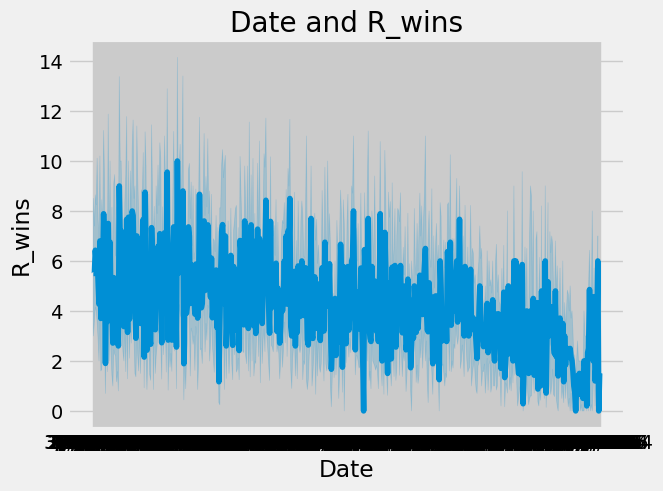

In [11]:
line_dependants=sns.lineplot(data=subr, x='date', y='R_wins')
plt.title('Date and R_wins')
plt.ylabel('R_wins')
plt.xlabel('Date')

In [12]:
data_types = {
    'date': 'datetime64'
}

In [13]:
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'UFC_MLRegression.csv')

In [14]:
parse_dates = ['date']

In [15]:
subr = pd.read_csv(file_path, parse_dates=parse_dates)

In [16]:
subr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   4560 non-null   int64         
 1   R_fighter                    4560 non-null   object        
 2   B_fighter                    4560 non-null   object        
 3   Referee                      4560 non-null   object        
 4   date                         4560 non-null   datetime64[ns]
 5   Winner                       4560 non-null   object        
 6   Title Fight                  4560 non-null   bool          
 7   weight_class                 4560 non-null   object        
 8   B Rounds                     4560 non-null   int64         
 9   B Title Fights               4560 non-null   int64         
 10  B_current_win_streak         4560 non-null   int64         
 11  B_current_lose_streak        4560 non-null 

In [17]:
from datetime import datetime

subr['datetime'] = pd.to_datetime(subr['date']) # Create a datetime column from "Date.""
subr = subr.set_index('datetime') # Set the datetime as the index of the dataframe.
subr.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
subr.head(500)

,Unnamed: 0,R_fighter,B_fighter,Referee,Winner,Title Fight,weight_class,B Rounds,B Title Fights,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Weight_lbs,R Rounds,R Title Fights,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Weight_lbs,B_age,R_age,R_Age Range,B_Age Range,Country1
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-03-20,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,Red,False,Bantamweight,4,0,0,1,1,1,1,0,0,0,1,Orthodox,135,1,0,1,0,1,1,0,0,0,1,0,Orthodox,135,31.0,27.0,Young Prospect,Experienced,United States of America
2021-03-20,1,Trevin Giles,Roman Dolidze,Herb Dean,Red,False,Middleweight,4,0,2,0,2,2,0,0,0,1,0,Orthodox,205,17,0,2,0,2,4,2,0,0,3,0,Orthodox,185,32.0,28.0,Experienced,Experienced,United States of America
2021-03-20,2,Marion Reneau,Macy Chiasson,Mark Smith,Blue,False,WomenBantamweight,11,1,3,0,3,4,1,0,1,2,1,Orthodox,135,30,0,2,0,2,5,6,0,1,2,2,Orthodox,135,29.0,43.0,Veteran,Experienced,United States of America
2021-03-20,3,Leonardo Santos,Grant Dawson,Chris Tognoni,Blue,False,Lightweight,10,0,4,0,4,4,0,0,2,0,2,Switch,145,18,1,1,0,6,7,1,0,2,2,2,Orthodox,155,27.0,41.0,Veteran,Young Prospect,United States of America
2021-03-20,4,Song Kenan,Max Griffin,Keith Peterson,Blue,False,Welterweight,28,0,0,1,1,4,6,0,1,2,0,Orthodox,170,10,0,2,0,2,4,1,0,1,3,0,Orthodox,170,35.0,31.0,Experienced,Experienced,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-16,495,Francisco Trinaldo,Bobby Green,Eduardo Herdy,Red,False,Lightweight,26,0,4,0,4,5,5,0,2,1,1,Orthodox,155,47,0,1,0,7,13,6,0,6,3,2,Southpaw,155,33.0,41.0,Veteran,Experienced,Brazil
2019-11-09,496,Alexander Volkov,Greg Hardy,Leon Roberts,Red,False,Heavyweight,7,0,0,1,2,2,2,0,0,2,0,Orthodox,265,16,0,4,0,4,4,1,0,1,2,0,Orthodox,250,31.0,31.0,Experienced,Experienced,Russia
2019-11-09,497,Shamil Gamzatov,Klidson Abreu,Leon Roberts,Red,False,LightHeavyweight,6,0,0,1,1,1,1,0,1,0,0,Orthodox,205,0,0,0,0,0,0,0,0,0,0,0,Orthodox,205,26.0,29.0,Experienced,Young Prospect,Russia


In [18]:
data_subr = subr

## Line Chart

In [19]:
data_subr = subr.reset_index()

In [20]:
subrf = data_subr

In [21]:
subrf.head()

,datetime,Unnamed: 0,R_fighter,B_fighter,Referee,Winner,Title Fight,weight_class,B Rounds,B Title Fights,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_Stance,B_Weight_lbs,R Rounds,R Title Fights,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_Stance,R_Weight_lbs,B_age,R_age,R_Age Range,B_Age Range,Country1
0,2021-03-20,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,Red,False,Bantamweight,4,0,0,1,1,1,1,0,0,0,1,Orthodox,135,1,0,1,0,1,1,0,0,0,1,0,Orthodox,135,31.0,27.0,Young Prospect,Experienced,United States of America
1,2021-03-20,1,Trevin Giles,Roman Dolidze,Herb Dean,Red,False,Middleweight,4,0,2,0,2,2,0,0,0,1,0,Orthodox,205,17,0,2,0,2,4,2,0,0,3,0,Orthodox,185,32.0,28.0,Experienced,Experienced,United States of America
2,2021-03-20,2,Marion Reneau,Macy Chiasson,Mark Smith,Blue,False,WomenBantamweight,11,1,3,0,3,4,1,0,1,2,1,Orthodox,135,30,0,2,0,2,5,6,0,1,2,2,Orthodox,135,29.0,43.0,Veteran,Experienced,United States of America
3,2021-03-20,3,Leonardo Santos,Grant Dawson,Chris Tognoni,Blue,False,Lightweight,10,0,4,0,4,4,0,0,2,0,2,Switch,145,18,1,1,0,6,7,1,0,2,2,2,Orthodox,155,27.0,41.0,Veteran,Young Prospect,United States of America
4,2021-03-20,4,Song Kenan,Max Griffin,Keith Peterson,Blue,False,Welterweight,28,0,0,1,1,4,6,0,1,2,0,Orthodox,170,10,0,2,0,2,4,1,0,1,3,0,Orthodox,170,35.0,31.0,Experienced,Experienced,United States of America


In [22]:
subrf = data_subr[['R_wins', 'datetime']]

In [23]:
subrf.head(100)

,R_wins,datetime
0,1,2021-03-20
1,4,2021-03-20
2,5,2021-03-20
3,7,2021-03-20
4,4,2021-03-20
...,...,...
95,0,2021-01-16
96,5,2020-12-19
97,4,2020-12-19
98,1,2020-12-19


In [24]:
subrf = subrf.groupby('datetime').agg({'R_wins':'mean'})

In [25]:
subrf.head()

,R_wins
datetime,
1994-03-11,1.5
1994-09-09,0.0
1994-12-16,6.0
1995-04-07,3.0
1995-07-14,1.8


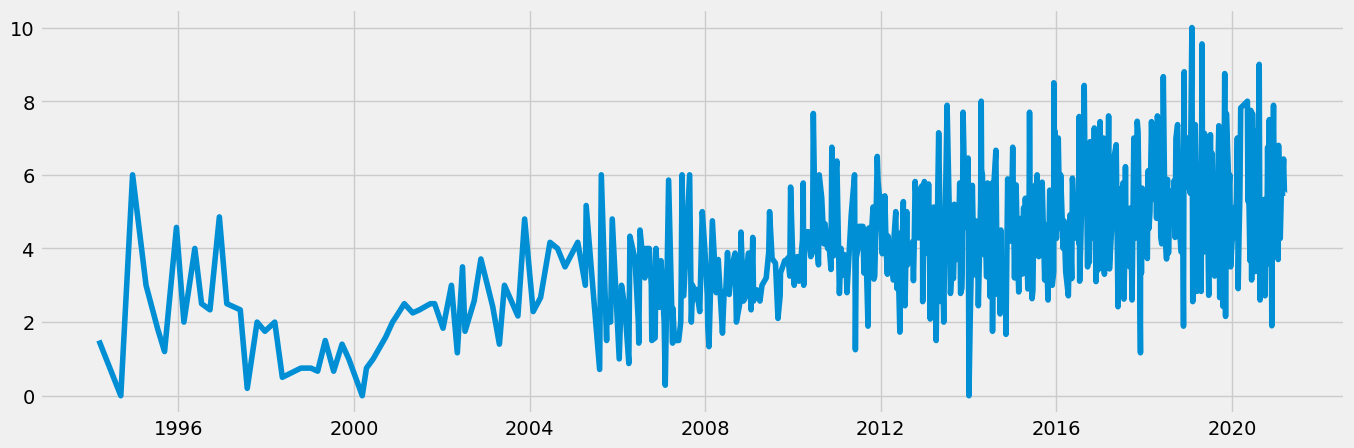

In [26]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(subrf)

In [27]:
subrf.isnull().sum() 

R_wins    0
dtype: int64

In [28]:
dups = subrf.duplicated()
dups.sum()

314

In [29]:
dups

datetime
1994-03-11    False
1994-09-09    False
1994-12-16    False
1995-04-07    False
1995-07-14    False
              ...  
2021-02-20    False
2021-02-27     True
2021-03-06    False
2021-03-13     True
2021-03-20     True
Length: 550, dtype: bool

In [30]:
subfr = subrf.drop_duplicates(subrf)

## Time-series

In [31]:
subrf1 = subrf.reset_index()

In [32]:
subrf1

,datetime,R_wins
0,1994-03-11,1.500000
1,1994-09-09,0.000000
2,1994-12-16,6.000000
3,1995-04-07,3.000000
4,1995-07-14,1.800000
...,...,...
545,2021-02-20,6.333333
546,2021-02-27,6.000000
547,2021-03-06,6.428571
548,2021-03-13,5.500000


In [33]:
subrf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  550 non-null    datetime64[ns]
 1   R_wins    550 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [34]:
time_series = subrf1['R_wins']

In [35]:
nul_subrf = pd.isnull(subrf1)

In [36]:
nul_subrf

,datetime,R_wins
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
545,False,False
546,False,False
547,False,False
548,False,False


In [37]:
subrf1.isnull().sum() 

datetime    0
R_wins      0
dtype: int64

In [38]:
subrf1

,datetime,R_wins
0,1994-03-11,1.500000
1,1994-09-09,0.000000
2,1994-12-16,6.000000
3,1995-04-07,3.000000
4,1995-07-14,1.800000
...,...,...
545,2021-02-20,6.333333
546,2021-02-27,6.000000
547,2021-03-06,6.428571
548,2021-03-13,5.500000


In [39]:
subrf2 = subrf1.reset_index()

In [40]:
subrf2

,index,datetime,R_wins
0,0,1994-03-11,1.500000
1,1,1994-09-09,0.000000
2,2,1994-12-16,6.000000
3,3,1995-04-07,3.000000
4,4,1995-07-14,1.800000
...,...,...,...
545,545,2021-02-20,6.333333
546,546,2021-02-27,6.000000
547,547,2021-03-06,6.428571
548,548,2021-03-13,5.500000


In [41]:
subrf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   index     550 non-null    int64         
 1   datetime  550 non-null    datetime64[ns]
 2   R_wins    550 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 13.0 KB


In [42]:
time_series = subrf2['R_wins']

In [74]:
subrf1.set_index('datetime').asfreq('d')
print(subrf1.index)

RangeIndex(start=0, stop=550, step=1)


In [43]:
subrf2['datetime'] = pd.to_datetime(subrf2['datetime'])

In [44]:
subrf2.set_index('datetime', inplace=True)

In [45]:
subrf2 = subrf2.asfreq('D')

In [46]:
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive',  extrapolate_trend='freq', period=2)

In [47]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

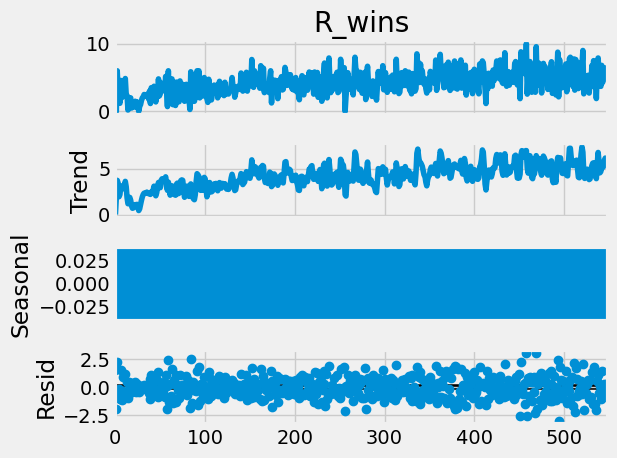

In [48]:
decomposition.plot()
plt.show()

## Dickey Fuller Test

In [52]:
subrf2 = subrf2.dropna()

In [53]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(subrf2['R_wins'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.133947
p-value                          0.231085
Number of Lags Used             15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64


In [54]:
# The P-value is not signifcant with red wins over time. This means that there is no significant impact time has on wins.

## Autocorrelation

In [57]:
subrf2 = subrf2.drop('index', axis=1)

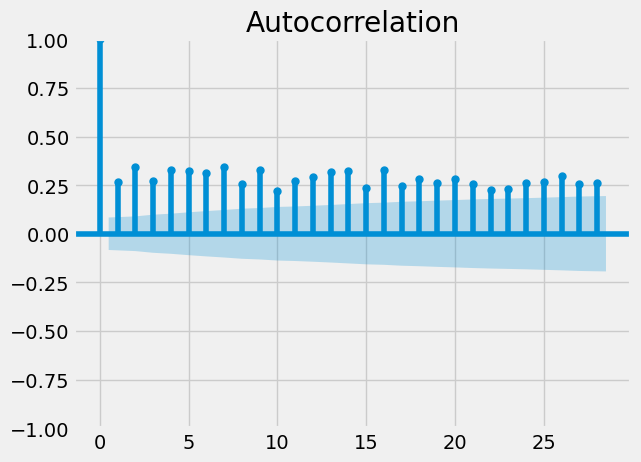

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(subrf2)
plt.show()